# Confidence Interval


In [56]:
import numpy as np
import scipy.stats as ss


def interval_of_mean(series, alpha):
    x = np.array(series)
    # https://books.google.com/books?id=ZBi1DAAAQBAJ&pg=PA111&lpg=PA111&dq=python+t_%7Bn-1%7D,%5Calpha/2&source=bl&ots=48wZ7PQS7K&sig=rH-nPDg3iKiaB7RKGGMvuAu31H8&hl=en&sa=X&ved=0ahUKEwj4iKrwpNTaAhUlheAKHcz5AS8Q6AEIQDAC#v=onepage&q=python%20t_%7Bn-1%7D%2C%5Calpha%2F2&f=false
    return ss.norm.interval(alpha, loc = np.mean(x), scale = ss.sem(x))


In [57]:
print(interval_of_mean([1,2,3,3,2,3,4,3,4,3,2,2], 0.95))
print(interval_of_mean([1,1,1,1,1,1,1,1,1,2,1,1], 0.95))

(2.1644545667747015, 3.1688787665586315)
(0.9200030012883288, 1.2466636653783378)


# Hypothesis Test

### Wald-test:
$T = \frac{|\bar{X} - \bar{Y}|}{\sqrt{\frac{1}{n}(\hat\sigma^2(X) + \hat\sigma^2(Y))}}$

### T-test:
$T = \frac{\sqrt{n} |\bar{X} - \bar{Y}| }{\hat s(X-Y)}$

## Two-side Test
$H_0: \mu(X) = \mu(Y)$

$H_1: \mu(X) \not= \mu(Y)$


## One-side Test
$H_0: \mu(X) = \mu(Y)$

$H_1: \mu(X) < \mu(Y)$



In [58]:
import numpy as np
import scipy.stats as ss

def wald_test(X, Y, one_side = False):
    '''
    X: array-like
    Y: array-like
    X and Y should be in the same length
    return: p-value
    '''
    x = np.array(X)
    y = np.array(Y)
    n = X.shape[0]
    T = np.abs(np.mean(x) - np.mean(y)) / np.sqrt((x.var() + x.var())/n)
    p = ss.norm.cdf(-T, 0, 1)
    if not one_side:
        p *= 2
    return p

def t_test(X, Y,one_side = False):
    '''
    X: array-like
    Y: array-like
    X and Y should be in the same length
    return: p-value
    '''
    x = np.array(X)
    y = np.array(Y)
    D = x - y
    T = np.mean(np.abs(D)) * np.sqrt(n) / D.std()
    df = n-1
    p = ss.t.cdf(-T, df)
    if not one_side:
        p *= 2
    return p

# Normal Test

In [59]:
import matplotlib.pyplot as plt
def normal_test(data, title = None, xlabel = None, ylabel = None):
    # find the range of data
    data = np.array(data)
    
    x_min = data.min()
    x_max = data.max()

    # sort data
    data = np.sort(data)

    # compute accumulate probabilities:
    cumulative_probs = [(i) / data.size for i in range(data.size)]

    # since \bar{F_n} is a step function, we use plt.step to draw it:
    # And we need to add boundary value 0 and 1 to accumulate_probs
    cumulative_probs = np.insert(cumulative_probs, 0, 0)
    cumulative_probs = np.append(cumulative_probs, 1)
    x = np.insert(data, 0,x_min-1)
    x = np.append(x, x_max+1)
    
    mu = data.mean()
    sigma = data.std()
    normal_x = np.linspace(x_min, x_max, 5000)
    normal_y = ss.norm.cdf(normal_x, mu, sigma) 
    
    data_to_normal =  ss.norm.cdf(data)[0]

    right_diff = abs(data_to_normal - cumulative_probs[1:-1])
    left_diff = abs(data_to_normal - cumulative_probs[0:-2])
    KS = max(np.max(right_diff), np.max(left_diff))
    print("KS statistic: {}".format(KS))

    fig = plt.figure()
    plt.step(x, cumulative_probs)
    plt.plot(normal_x,normal_y, '--r')
    plt.legend(["Empirical CDF","CDF of N(\hat{\mu}, \hat{\sigma})"])
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.xlim((x_min,x_max))
    plt.ylim((0,1))
    return fig
    

KS statistic: 0.0021606024799031287


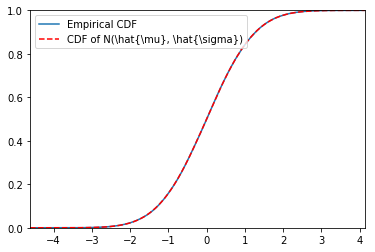

In [60]:
data = np.random.normal(size=(1,100000), loc=0, scale=1) 
fig = normal_test(data)